In [3]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [4]:
X = pd.read_csv(r"DATASET/SKIN_AFDM.csv",delimiter=";", decimal=",")
#X.dtypes
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age_BIN                   249 non-null    object 
 1   Ville                     250 non-null    object 
 2   Cerne_Surface             250 non-null    float64
 3   Cerne_Haralick_Contraste  250 non-null    float64
 4   Cerne_Haralick_Entropie   250 non-null    float64
 5   Cerne_Rugosite_Rt         250 non-null    float64
 6   Cerne_Rugosite_Ra         250 non-null    float64
 7   Cerne_Orientation_Aniso   250 non-null    float64
 8   Cerne_H76                 250 non-null    float64
 9   Cerne_Contraste_dL        250 non-null    float64
 10  Cerne_Contraste_da        250 non-null    float64
 11  Cerne_Contraste_db        250 non-null    float64
 12  Cerne_Contraste_dC        250 non-null    float64
 13  Cerne_Contraste_dh        250 non-null    float64
 14  Cerne_Cont

In [5]:
Xindex = X.set_index(['Age_BIN','Ville'])

X

,Age_BIN,Ville,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,Cerne_Contraste_dL,...,Paup_ITA,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur
0,L,Europe,71541.0,1.8669,5.6292,103.5,12.5397,8.9513,5.4579,14.4782,...,44.7492,75.1704,7.1162,2.5630,5.9539,203.0,15.1434,9.3552,424069.5,446.5085
1,L,Europe,89193.5,4.2191,5.9259,96.5,11.7330,11.8962,4.2646,18.2627,...,0.5550,61.7410,6.6843,10.8779,6.8301,210.0,16.9882,14.9127,493232.0,496.9325
2,H,Europe,44993.5,2.1424,5.3528,100.0,9.0888,7.7184,4.0401,12.1515,...,42.4604,72.9530,7.6134,5.0513,6.2248,163.0,13.6760,11.7784,380649.0,427.0025
3,L,Europe,37159.5,3.3100,5.9635,112.0,12.3705,14.4397,3.8183,15.1668,...,37.2925,73.6508,7.8988,7.6544,6.5372,215.0,18.0385,9.2540,442697.0,459.0190
4,H,Europe,182202.5,3.8090,6.0859,104.5,12.0235,10.8535,5.8068,9.9939,...,27.0483,69.4875,8.9338,6.8041,6.5861,203.5,16.2301,10.6475,396187.0,433.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,H,Shangai,79881.5,7.8976,6.4934,121.0,12.6881,7.9492,5.0041,20.5832,...,-22.5923,54.6670,7.4186,14.1595,7.0426,204.5,17.5427,15.4597,369427.5,377.5360
246,H,Shenzen,22257.5,4.6232,5.8537,117.0,9.4606,9.9207,4.1151,20.0899,...,17.7227,63.1220,6.4908,13.1179,6.8222,214.0,16.9821,15.7685,476262.0,468.7090
247,H,Shangai,67730.5,5.8096,6.1625,113.0,10.7707,8.8858,4.6609,14.8233,...,9.3687,57.3442,6.1580,6.5920,6.3345,195.5,13.2818,10.3541,419504.0,423.2240
248,H,Shangai,0.0,4.8244,5.8134,127.0,8.0854,9.0966,0.0000,0.0000,...,6.7732,57.6021,5.6482,8.8768,6.4174,199.5,12.7726,14.3511,347327.5,347.1360


X.isnull().sum()


In [6]:
X.drop_duplicates(keep="last", inplace=True)
display(len(X))

250

In [7]:
X_pas_nan = X.dropna()
display(X_pas_nan.isna().sum())
display(len(X_pas_nan))

Age_BIN                     0
Ville                       0
Cerne_Surface               0
Cerne_Haralick_Contraste    0
Cerne_Haralick_Entropie     0
Cerne_Rugosite_Rt           0
Cerne_Rugosite_Ra           0
Cerne_Orientation_Aniso     0
Cerne_H76                   0
Cerne_Contraste_dL          0
Cerne_Contraste_da          0
Cerne_Contraste_db          0
Cerne_Contraste_dC          0
Cerne_Contraste_dh          0
Cerne_Contraste_dITA        0
Cerne_Contraste_dIWA        0
Cerne_Peau_L                0
Cerne_Peau_a                0
Cerne_Peau_b                0
Cerne_Peau_c                0
Cerne_Peau_h                0
Cerne_Peau_ITA              0
Cerne_Peau_IWA              0
Cerne_L                     0
Cerne_a                     0
Cerne_b                     0
Cerne_c                     0
Cerne_h                     0
Cerne_ITA                   0
Cerne_IWA                   0
Paup_L                      0
Paup_a                      0
Paup_b                      0
Paup_c    

249

In [8]:
X=X_pas_nan
import numpy as np

X = X.select_dtypes(exclude=['object'])
display(len(X))

249

In [9]:
# On regarde corrélations et distributions

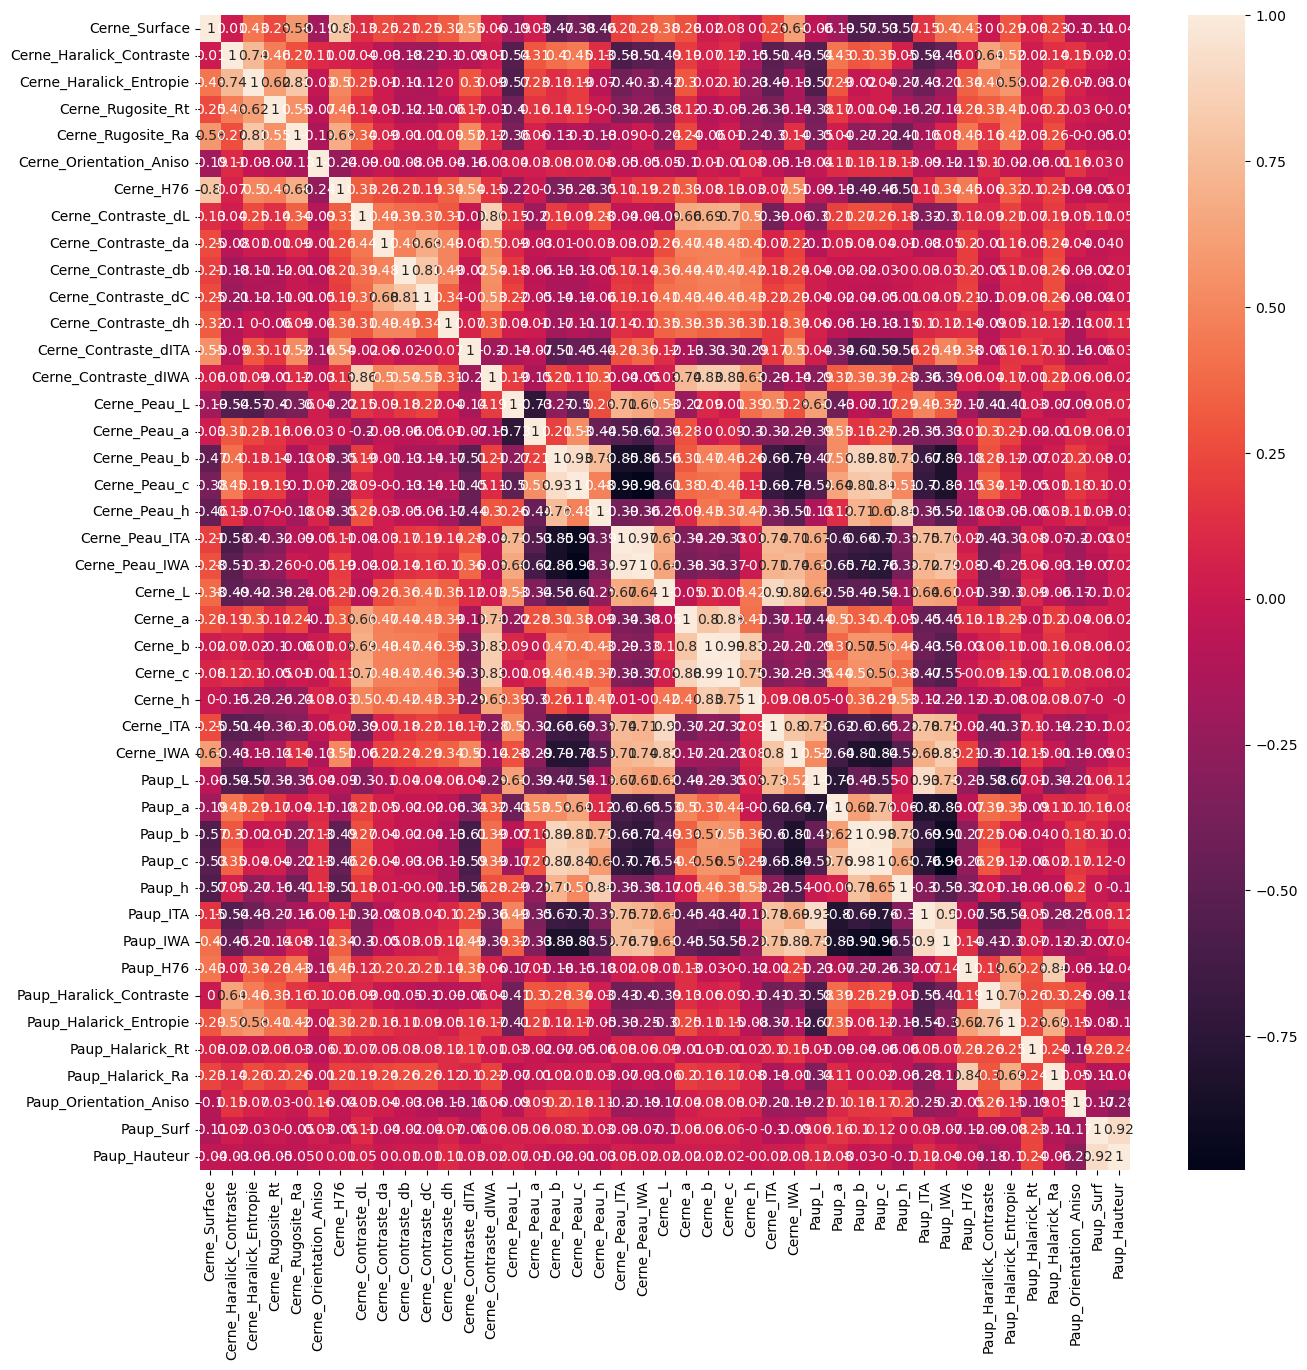

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = X.corr(method="spearman")
corr = corr.round(2)
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True)

plt.show()

In [11]:
# On va pouvoir réduire avec ACP

# On regarde les distributions

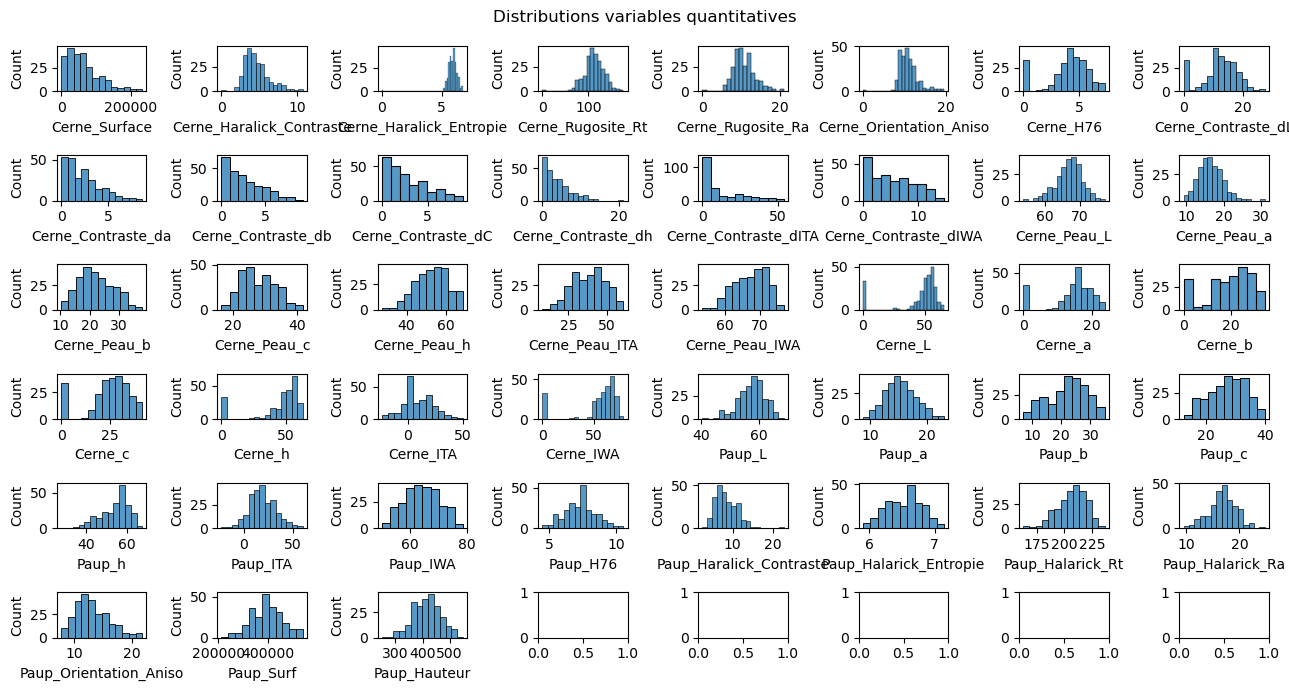

In [12]:
var_quant = X

NUM_COLS = 8
NUM_ROWS = math.ceil(var_quant.shape[1] / NUM_COLS)

_, axes = plt.subplots(NUM_ROWS, NUM_COLS, figsize=(13, 7))

for col, ax in zip(var_quant, axes.flatten()):
    sns.histplot(x=col, data=var_quant, ax=ax)

plt.suptitle("Distributions variables quantitatives")
plt.tight_layout()
plt.show()


##### librairie graphique
import seaborn as sns
#pairplot
sns.pairplot(X)

C:\Users\ryann\AppData\Local\Temp\ipykernel_4836\2824473318.py:39: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


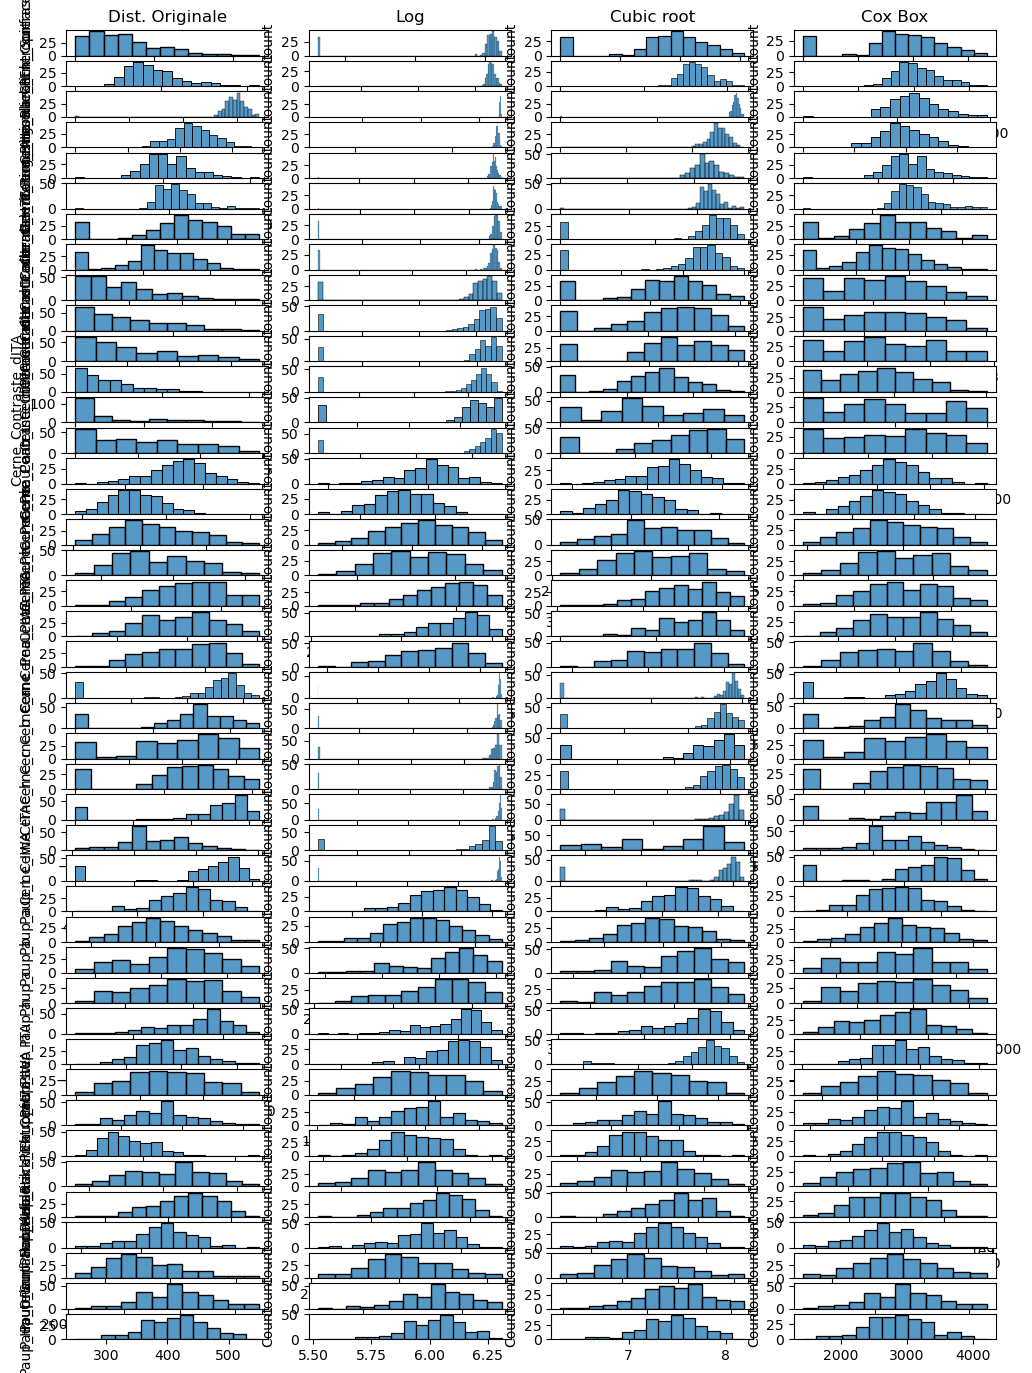

In [13]:
import warnings
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import yeojohnson

# transformations
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning)

    # colonnes d'interet
    coi = var_quant

    _, axes = plt.subplots(coi.shape[1], 4, figsize=(12, 17))

    for col_index, col_name in enumerate(coi):
        dist = coi[col_name]

        axes[col_index, 0].set_ylabel(col_name)

        # normal dist
        sns.histplot(dist.to_numpy(), ax=axes[col_index, 0])

        # log
        new_dist = np.log(dist + 1e-6)
        sns.histplot(new_dist.to_numpy(), ax=axes[col_index, 1])

        # cubic root
        new_dist = np.cbrt(dist)
        sns.histplot(new_dist.to_numpy(), ax=axes[col_index, 2])

        # cox box 
        new_dist, _  = yeojohnson(dist)
        sns.histplot(new_dist, ax=axes[col_index, 3])

    axes[0, 0].set_title("Dist. Originale")
    axes[0, 1].set_title("Log")
    axes[0, 2].set_title("Cubic root")
    axes[0, 3].set_title("Cox Box")

    plt.tight_layout()
    plt.show()

In [14]:
# On standardise avec RobustScaler
X=pd.DataFrame(X,columns = X.columns)


In [15]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
Z = rc.fit_transform(X)
Z1 = pd.DataFrame(data = Z, columns = X.columns,index=X.index)
Z1.head()

,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,Cerne_Contraste_dL,Cerne_Contraste_da,Cerne_Contraste_db,...,Paup_ITA,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur
0,0.304192,-1.302422,-0.738496,-0.333333,0.630533,-0.608758,0.629450,0.294699,-0.199991,0.041255,...,1.489096,1.220253,-0.191849,-1.440403,-1.572970,-0.297297,-0.531809,-0.861674,0.328616,0.452326
1,0.608160,-0.025301,-0.072503,-0.607843,0.395905,0.479527,-0.014186,0.907058,-0.375367,0.003344,...,-0.945900,-0.234247,-0.522098,0.789749,0.678314,0.081081,0.015334,0.566696,1.095699,1.187466
2,-0.152944,-1.152840,-1.358923,-0.470588,-0.373160,-1.064375,-0.135275,-0.081777,0.697249,0.328821,...,1.362989,0.980093,0.188332,-0.773013,-0.876927,-2.459459,-0.967020,-0.238871,-0.152962,0.167945
3,-0.287842,-0.518895,0.011897,0.000000,0.581322,1.419475,-0.254908,0.406120,0.023086,-0.503071,...,1.078250,1.055670,0.406561,-0.074831,-0.074255,0.351351,0.326838,-0.887684,0.535214,0.634719
4,2.209734,-0.247964,0.286644,-0.294118,0.480397,0.094198,0.817638,-0.430892,-0.371413,-0.527798,...,0.513818,0.604755,1.197966,-0.302891,0.051387,-0.270270,-0.209509,-0.529531,0.019370,0.266755


In [16]:
Z1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 0 to 249
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cerne_Surface             249 non-null    float64
 1   Cerne_Haralick_Contraste  249 non-null    float64
 2   Cerne_Haralick_Entropie   249 non-null    float64
 3   Cerne_Rugosite_Rt         249 non-null    float64
 4   Cerne_Rugosite_Ra         249 non-null    float64
 5   Cerne_Orientation_Aniso   249 non-null    float64
 6   Cerne_H76                 249 non-null    float64
 7   Cerne_Contraste_dL        249 non-null    float64
 8   Cerne_Contraste_da        249 non-null    float64
 9   Cerne_Contraste_db        249 non-null    float64
 10  Cerne_Contraste_dC        249 non-null    float64
 11  Cerne_Contraste_dh        249 non-null    float64
 12  Cerne_Contraste_dITA      249 non-null    float64
 13  Cerne_Contraste_dIWA      249 non-null    float64
 14  Cerne_Peau_L   

In [17]:

X4=Z1

#X=pd.DataFrame(X)
X4.head()

,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,Cerne_Contraste_dL,Cerne_Contraste_da,Cerne_Contraste_db,...,Paup_ITA,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur
0,0.304192,-1.302422,-0.738496,-0.333333,0.630533,-0.608758,0.629450,0.294699,-0.199991,0.041255,...,1.489096,1.220253,-0.191849,-1.440403,-1.572970,-0.297297,-0.531809,-0.861674,0.328616,0.452326
1,0.608160,-0.025301,-0.072503,-0.607843,0.395905,0.479527,-0.014186,0.907058,-0.375367,0.003344,...,-0.945900,-0.234247,-0.522098,0.789749,0.678314,0.081081,0.015334,0.566696,1.095699,1.187466
2,-0.152944,-1.152840,-1.358923,-0.470588,-0.373160,-1.064375,-0.135275,-0.081777,0.697249,0.328821,...,1.362989,0.980093,0.188332,-0.773013,-0.876927,-2.459459,-0.967020,-0.238871,-0.152962,0.167945
3,-0.287842,-0.518895,0.011897,0.000000,0.581322,1.419475,-0.254908,0.406120,0.023086,-0.503071,...,1.078250,1.055670,0.406561,-0.074831,-0.074255,0.351351,0.326838,-0.887684,0.535214,0.634719
4,2.209734,-0.247964,0.286644,-0.294118,0.480397,0.094198,0.817638,-0.430892,-0.371413,-0.527798,...,0.513818,0.604755,1.197966,-0.302891,0.051387,-0.270270,-0.209509,-0.529531,0.019370,0.266755


In [18]:
# on va réduire les dimensions

In [19]:
import sklearn as sk

In [20]:
from sklearn.decomposition import PCA

In [21]:
print(PCA)

<class 'sklearn.decomposition._pca.PCA'>


In [22]:
acp=PCA(svd_solver='full')
print(acp)

PCA(svd_solver='full')


In [23]:
coord=acp.fit_transform(X4)

In [24]:
print(coord)

[[-2.23812926e+00 -4.32346501e+00 -1.11370795e-01 ...  9.53280048e-04
  -4.64840628e-03 -5.19762062e-03]
 [-8.88188888e-01  4.16294618e-01 -1.10671353e+00 ... -5.39479979e-03
  -1.19743492e-02  5.13786224e-03]
 [-1.95554107e+00 -4.19983602e+00  3.06225742e-01 ...  1.53123430e-02
   3.56738923e-03 -5.88415194e-03]
 ...
 [-1.04741391e+00  2.23677919e+00  8.15869441e-01 ... -1.23330383e-02
   1.28079982e-03  4.22888997e-03]
 [ 9.26441634e+00 -3.20335033e-02 -5.79811359e-01 ... -8.27269286e-03
   6.77733659e-04 -7.07882217e-03]
 [-2.37137324e+00 -2.33726235e+00  2.14565952e+00 ...  2.89882576e-03
   4.90332800e-03 -1.06147035e-04]]


In [25]:
print(acp.explained_variance_ratio_)

[3.84421729e-01 1.82724752e-01 1.16803325e-01 4.43309994e-02
 3.91255264e-02 3.60940343e-02 2.87649690e-02 2.36200453e-02
 2.07413532e-02 1.60990812e-02 1.44914704e-02 1.32962150e-02
 1.11856900e-02 1.07876334e-02 9.60963360e-03 8.85254193e-03
 8.06942603e-03 5.33872660e-03 4.64121654e-03 4.37147468e-03
 3.39251430e-03 2.50439549e-03 1.85462110e-03 1.73469295e-03
 1.41291817e-03 1.18956346e-03 9.26709600e-04 8.87420746e-04
 7.32808669e-04 6.13478661e-04 4.94736755e-04 3.31795373e-04
 2.06825257e-04 1.17885793e-04 9.68625471e-05 4.49656491e-05
 2.93068434e-05 2.59430886e-05 1.76822425e-05 9.35104843e-06
 3.06566631e-06 1.68415545e-06 9.29260538e-07]


In [26]:
# On a 56% de variance expliquée sur 2 axes, 68% de variance expliquée sur 3 axes. 

In [27]:
# Les Valeurs propres
eigval = acp.explained_variance_
print([eigval])

[array([1.29124639e+01, 6.13759992e+00, 3.92334411e+00, 1.48904806e+00,
       1.31419977e+00, 1.21237402e+00, 9.66195710e-01, 7.93381226e-01,
       6.96687920e-01, 5.40757168e-01, 4.86758618e-01, 4.46610801e-01,
       3.75719704e-01, 3.62349255e-01, 3.22781045e-01, 2.97350852e-01,
       2.71046522e-01, 1.79324189e-01, 1.55895301e-01, 1.46834856e-01,
       1.13952244e-01, 8.41209381e-02, 6.22954590e-02, 5.82671541e-02,
       4.74589585e-02, 3.99566262e-02, 3.11275440e-02, 2.98078582e-02,
       2.46145439e-02, 2.06063302e-02, 1.66178705e-02, 1.11447805e-02,
       6.94711945e-03, 3.95970346e-03, 3.25354696e-03, 1.51036551e-03,
       9.84396901e-04, 8.71410667e-04, 5.93934476e-04, 3.14095345e-04,
       1.02973642e-04, 5.65696339e-05, 3.12132283e-05])]


In [28]:
# on compare au cutoff de Saporta (1+ sqrt(p-1/n-1))
# On garde 2 facteurs 

n=X4.shape[0]
p=X4.shape[1]
Saporta=1+ np.sqrt((p-1)/(n-1))
print(Saporta)

1.4115274458765508


43


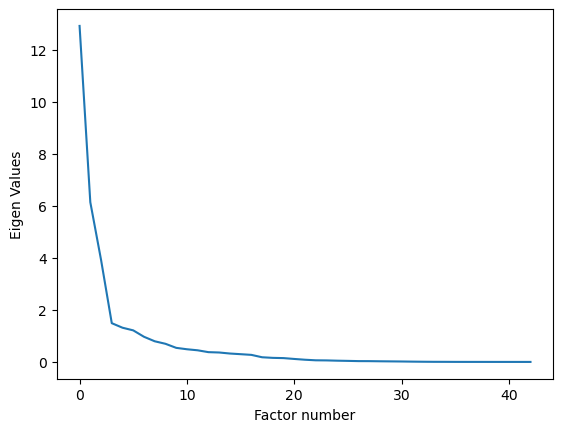

In [29]:
#nombre de variables
p = X4.shape[1]
print(p)
#nombre d'observations
n = X4.shape[0]
#matrice des X
X = X4.values

import matplotlib.pyplot as plt
plt.plot(np.arange(p),eigval)
plt.ylabel("Eigen Values")
plt.xlabel("Factor number")
plt.show()

In [30]:
acp=PCA(n_components=4,svd_solver='full')
coord=acp.fit_transform(X4)
print(coord)

[[-2.23812926e+00 -4.32346501e+00 -1.11370795e-01 -3.74455740e-01]
 [-8.88188888e-01  4.16294618e-01 -1.10671353e+00  3.69096593e-02]
 [-1.95554107e+00 -4.19983602e+00  3.06225742e-01  8.56081414e-01]
 [-1.65639609e+00 -3.22619352e+00 -1.50793613e+00 -7.34145783e-01]
 [-1.89536375e+00 -1.86160532e+00 -2.48551068e+00  3.07112719e-01]
 [-2.19807430e+00 -1.32397859e+00 -2.94519865e+00 -1.36841475e+00]
 [-1.45391514e+00 -4.21274356e-01 -1.12640794e+00 -5.17665224e-01]
 [-3.98782195e-01  3.60804434e+00 -3.74346681e+00  5.22532086e-01]
 [-2.54218860e+00 -1.39016850e+00 -1.74515037e+00  1.55524586e+00]
 [-1.16188916e+00  1.26569165e-01 -3.86600945e-01 -2.59391918e-01]
 [-1.42054979e+00 -2.45115051e+00 -2.09419756e+00  1.29584088e+00]
 [-2.06506640e+00 -4.49087676e+00 -1.26141340e+00  9.44738339e-01]
 [-1.34044939e+00  1.50093734e+00 -2.41253248e+00  8.87077031e-01]
 [-1.76742126e+00 -2.35604079e+00 -1.38808122e+00  9.29732699e-01]
 [-1.49411080e+00 -8.94284707e-01 -3.37498410e+00 -4.07919093e

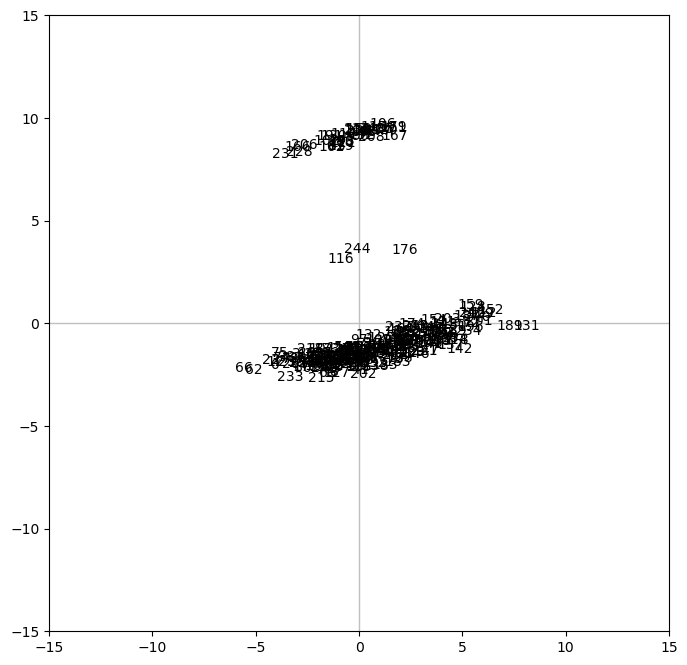

In [31]:

f,ax = plt.subplots(figsize=(8,8))
#fig, axes = plt.plot(figsize=(10,10))
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)
n = X4.shape[0]

for i in range(n):
    plt.annotate(X4.index[i],(coord[i,1],coord[i,0]))
plt.plot([-15,15],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-15,15],color='silver',linestyle='-',linewidth=1)
plt.show()

In [32]:
from sklearn.cluster import KMeans
from sklearn import metrics 
wcss=[]
res=[]
figsize=(9, 7)

C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

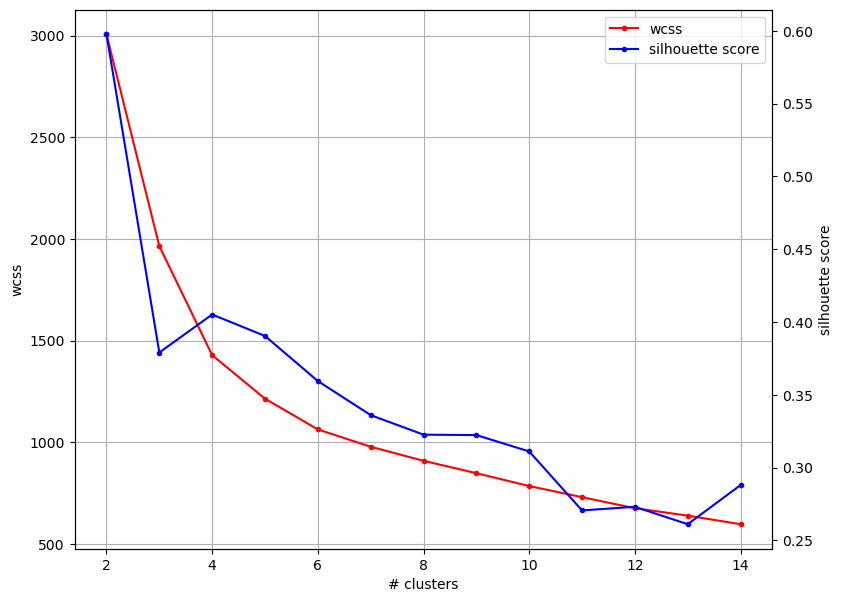

In [33]:
clusters_range = range(2,15)
for k in clusters_range:
    km = KMeans(n_clusters=k, n_init=20, max_iter=300)
    km.fit(coord)
    wcss.append(km.inertia_)
    res.append(metrics.silhouette_score(coord,km.labels_) )
    
_, ax1 = plt.subplots(figsize=figsize)
    
ax1.plot(clusters_range, wcss, label="wcss", color="red", marker=".")
ax1.set_xlabel("# clusters")
ax1.set_ylabel("wcss")
ax1.grid(True)
    
ax2 = plt.gca().twinx()
ax2.plot(clusters_range, res, label="silhouette score", color="blue", marker=".")
ax2.set_ylabel("silhouette score")

g1, gl1 = ax1.get_legend_handles_labels()
g2, gl2 = ax2.get_legend_handles_labels()
plt.legend(g1 + g2, gl1 + gl2)

plt.show()

In [34]:
# On peut essayer 4 clusters

In [35]:
km = KMeans(n_clusters=2) 
km.fit(coord)
km.labels_
cluster_labels = km.predict(coord)
km.inertia_



C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3006.7047120739144

In [36]:
from sklearn.metrics import silhouette_score
score=silhouette_score(coord,cluster_labels)
score

0.5976613071287883

In [37]:
cluster_count = 2
km = KMeans(n_clusters=cluster_count, n_init=20, max_iter=300) 
km.fit(coord) 
km.labels_
cluster_labels = km.fit_predict(coord)
cluster_labels


df_clustered=X4.copy()
df_clustered=pd.DataFrame(df_clustered)
df_clustered["cluster"]=cluster_labels
df_clustered.head()


C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,Cerne_Contraste_dL,Cerne_Contraste_da,Cerne_Contraste_db,...,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur,cluster
0,0.304192,-1.302422,-0.738496,-0.333333,0.630533,-0.608758,0.629450,0.294699,-0.199991,0.041255,...,1.220253,-0.191849,-1.440403,-1.572970,-0.297297,-0.531809,-0.861674,0.328616,0.452326,1
1,0.608160,-0.025301,-0.072503,-0.607843,0.395905,0.479527,-0.014186,0.907058,-0.375367,0.003344,...,-0.234247,-0.522098,0.789749,0.678314,0.081081,0.015334,0.566696,1.095699,1.187466,1
2,-0.152944,-1.152840,-1.358923,-0.470588,-0.373160,-1.064375,-0.135275,-0.081777,0.697249,0.328821,...,0.980093,0.188332,-0.773013,-0.876927,-2.459459,-0.967020,-0.238871,-0.152962,0.167945,1
3,-0.287842,-0.518895,0.011897,0.000000,0.581322,1.419475,-0.254908,0.406120,0.023086,-0.503071,...,1.055670,0.406561,-0.074831,-0.074255,0.351351,0.326838,-0.887684,0.535214,0.634719,1
4,2.209734,-0.247964,0.286644,-0.294118,0.480397,0.094198,0.817638,-0.430892,-0.371413,-0.527798,...,0.604755,1.197966,-0.302891,0.051387,-0.270270,-0.209509,-0.529531,0.019370,0.266755,1


In [38]:
num_clusters=2
sample_silhouette_values = metrics.silhouette_samples(coord, km.labels_)

moy_Score_cluster = []
for i in range(num_clusters):
    moy_Score_cluster.append(sample_silhouette_values[km.labels_ == i].mean())
print(moy_Score_cluster)

[0.7519049576608985, 0.5740963049641604]


In [39]:
# Ici on va annoter les individus

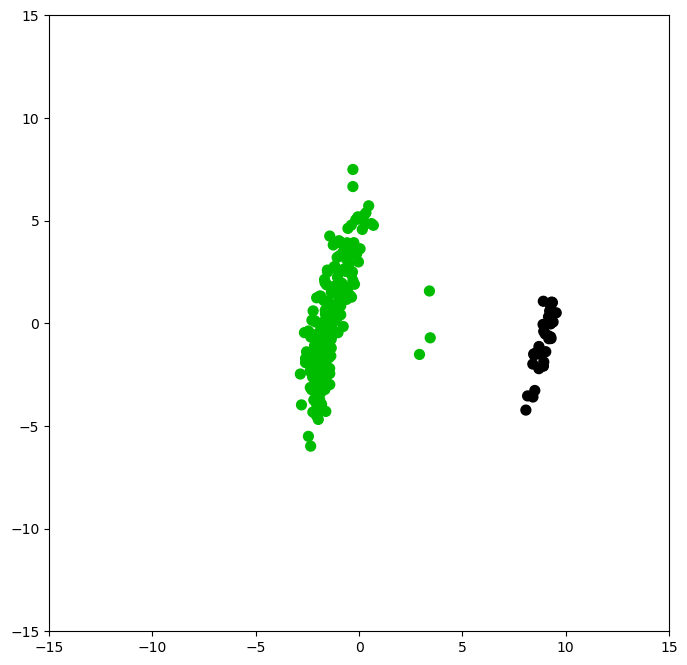

In [40]:
import matplotlib.cm as cm

f,ax = plt.subplots(figsize=(8,8))
#fig, axes = plt.plot(figsize=(12,12))
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)
n = coord.shape[0]

color = cm.nipy_spectral(cluster_labels/2)

# Traçage du nuage de points
for k in range(7):
    is_kth_cluster = (cluster_labels==k)
    ax.scatter(coord[is_kth_cluster,0],coord[is_kth_cluster,1],c=color[is_kth_cluster],s=50)

#for i in range(n):
 #   plt.annotate(Xindex.index[i],coord[i,0],coord[i,1])
#plt.scatter(coord[:,0], coord[:,1], c=cluster_labels)

In [41]:
from sklearn.metrics import davies_bouldin_score
labels=km.labels_
davies_bouldin_score(coord, cluster_labels)


0.514250850639959

In [42]:
# score correct

In [43]:
# On peut maintenant caractériser chaque cluster

In [44]:

#moyenne par variable
m = np.mean(X)

n=X.shape[0]
variance = X4.var(ddof=0)

TSS = X4.shape[0]*X.var(ddof=0)

#data.frame conditionnellement aux groupes
gb = X4.groupby(cluster_labels)

#effectifs conditionnels
nk = gb.size()
print("nk")
print(nk)

#moyennes conditionnelles
mk = gb.mean()

print("mk")
print(mk)

#pour chaque groupe écart à la moyenne par variable
EMk = (mk-m)**2

#pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)

BSS = np.sum(EM, axis=0)

R2 = BSS/TSS

print("R2")
print(R2)


nk
0     33
1    216
dtype: int64
mk
   Cerne_Surface  Cerne_Haralick_Contraste  Cerne_Haralick_Entropie  \
0      -0.927712                  0.492980                -0.134884   
1       0.317422                  0.127353                -0.067674   

   Cerne_Rugosite_Rt  Cerne_Rugosite_Ra  Cerne_Orientation_Aniso  Cerne_H76  \
0           0.157457          -0.292602                 0.423651  -2.314401   
1          -0.010712           0.195438                 0.091323   0.160775   

   Cerne_Contraste_dL  Cerne_Contraste_da  Cerne_Contraste_db  ...  Paup_ITA  \
0           -2.047976           -0.762468           -0.665809  ... -0.150965   
1            0.174694            0.335841            0.280065  ...  0.103644   

   Paup_IWA  Paup_H76  Paup_Haralick_Contraste  Paup_Halarick_Entropie  \
0 -0.317869 -0.668001                 0.215077               -0.294435   
1  0.077227  0.048619                 0.110697               -0.044392   

   Paup_Halarick_Rt  Paup_Halarick_Ra  Paup_Ori

In [45]:
#On voit des caractéristiques de chaque cluster

In [46]:
# On va aintenant utiliser CAH. Les 2 librairies vont être utilisées pour pratique

# La méthode CAH mesure des distances indiquant des similarités entre individus. Le résultat final est le dendrogramme et 

# le coeff de correlation (c) "cophenic" est la mesure de ressemblance entre individus du fait du clustering. Ce sont ces distances 
# qui sont reliées aux "heights" donc distances donc gain en inertie entre clusters.


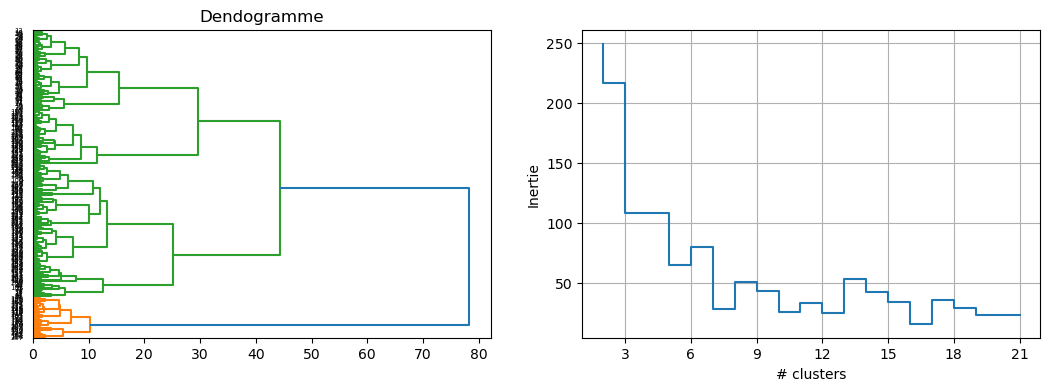

In [47]:
from matplotlib.ticker import MaxNLocator
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

#générer la matrice des liens
Z = linkage(coord,method='ward',metric='euclidean')

c, coph_dists = cophenet(Z, pdist(coord))


figsize=(13, 4) 
num_clusters=20
    
plt.figure(figsize=figsize)
plt.subplot(121)
dendrogram(Z,orientation='right')
plt.title("Dendogramme")
        
cluster_inertias = Z[-num_clusters:, 3]
cluster_inertias = cluster_inertias[::-1]
    
plt.subplot(122)
plt.step(range(2, len(cluster_inertias) + 2), cluster_inertias)
plt.xlabel("# clusters")
plt.ylabel("Inertie")
plt.grid()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    
plt.show()


In [48]:
# Autre librairie pour CAH

In [49]:
# On peut tagger les clusters et calculer les métriques de validations

In [50]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(coord)
labels=cluster.labels_

C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


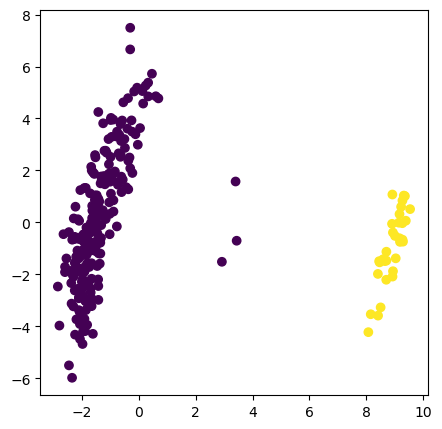

In [51]:
plt.figure(figsize=(5, 5))

for k in range(2):
    is_kth_cluster = (cluster_labels==k)
    ax.scatter(coord[is_kth_cluster,0],coord[is_kth_cluster,1],c=color[is_kth_cluster],s=50)

n = X4.shape[0]
#for i in range(n):
#    plt.annotate(X4.index[i],(coord[i,0],coord[i,1]))
plt.scatter(coord[:,0], coord[:,1], c=cluster.labels_)

In [52]:
from sklearn.metrics import silhouette_score
score=silhouette_score(coord,labels)
score

0.5976613071287883

In [53]:
# On peut regarder également ici les différences de moyennes des variables initiales dans les clusters

In [54]:
#moyenne par variable
m = np.mean(X)

n=X.shape[0]
variance = X4.var(ddof=0)

TSS = X4.shape[0]*X.var(ddof=0)

#data.frame conditionnellement aux groupes
gb = X4.groupby(cluster.labels_)

#effectifs conditionnels
nk = gb.size()
print("nk")
print(nk)

#moyennes conditionnelles
mk = gb.mean()

print("mk")
print(mk)

#pour chaque groupe écart à la moyenne par variable
EMk = (mk-m)**2

#pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)

BSS = np.sum(EM, axis=0)

R2 = BSS/TSS

print("R2")
print(R2)

nk
0    216
1     33
dtype: int64
mk
   Cerne_Surface  Cerne_Haralick_Contraste  Cerne_Haralick_Entropie  \
0       0.317422                  0.127353                -0.067674   
1      -0.927712                  0.492980                -0.134884   

   Cerne_Rugosite_Rt  Cerne_Rugosite_Ra  Cerne_Orientation_Aniso  Cerne_H76  \
0          -0.010712           0.195438                 0.091323   0.160775   
1           0.157457          -0.292602                 0.423651  -2.314401   

   Cerne_Contraste_dL  Cerne_Contraste_da  Cerne_Contraste_db  ...  Paup_ITA  \
0            0.174694            0.335841            0.280065  ...  0.103644   
1           -2.047976           -0.762468           -0.665809  ... -0.150965   

   Paup_IWA  Paup_H76  Paup_Haralick_Contraste  Paup_Halarick_Entropie  \
0  0.077227  0.048619                 0.110697               -0.044392   
1 -0.317869 -0.668001                 0.215077               -0.294435   

   Paup_Halarick_Rt  Paup_Halarick_Ra  Paup_Ori

In [55]:
# On peut essayer DBSCAN

In [56]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns

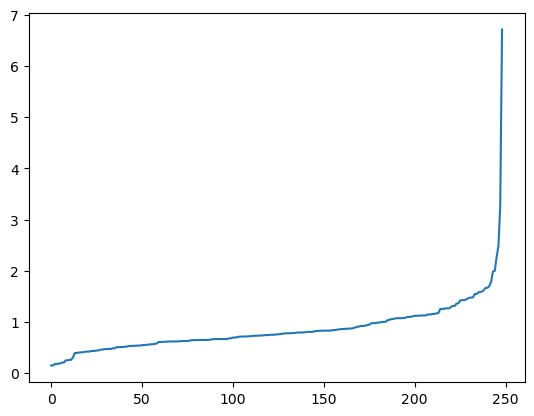

In [57]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(coord)
distances, indices = nbrs.kneighbors(coord)


distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [58]:
from sklearn.cluster import DBSCAN

In [66]:
epsilon = [0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6]
min_samples = [2,3,4,5,6,7,8,9,10]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(coord)
        #cluster_labels=dbscan.fit_predict(coord) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = metrics.silhouette_score(coord, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1.6 
min_sample= 4 
number of clusters= 2 
average silhouette score= 0.4158


In [60]:
outlier_percent = [] 

for eps in np.linspace(0.1,0.5): # check 50 values of epsilon between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=4)
    dbscan.fit(coord)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)
print(perc_outliers)

98.39357429718875


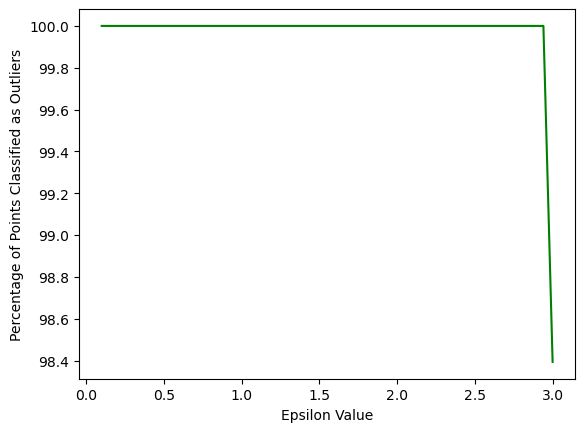

In [61]:
sns.lineplot(x=np.linspace(0.1,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

In [62]:
dbscan = DBSCAN(eps=1.6,min_samples=4)
dbscan.fit(coord)

DBSCAN(eps=1.6, min_samples=4)

In [63]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  1,  0,  1,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  0,  1,  0, -1,  0,  0,  1,  0,  1, -1,  1,  0,  1,
        1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -1,  1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0

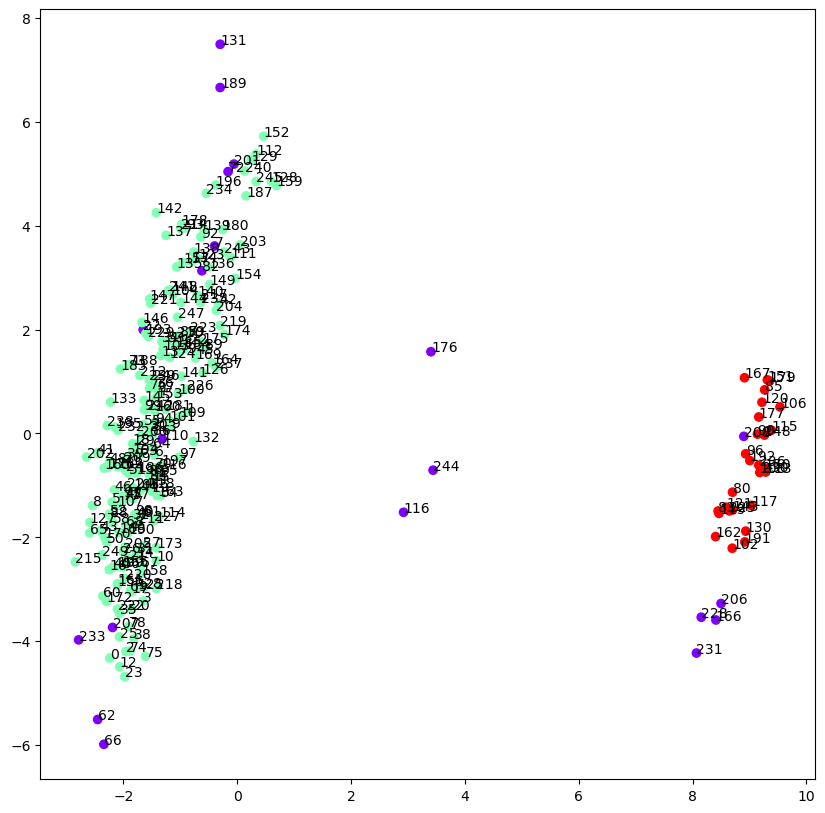

In [64]:
plt.figure(figsize=(10, 10))

n = X4.shape[0]
for i in range(n):
    plt.annotate(X4.index[i],(coord[i,0],coord[i,1]))
plt.scatter(coord[:,0], coord[:,1], c=dbscan.labels_, cmap='rainbow')

In [65]:
# Trop peu d'individus pour que DBSCAN soit intéressant car basé sur des densités de points